

# Assignment 6

### 黄士诚

### 3160103847

### 序号：1


#### 一、画椭圆

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

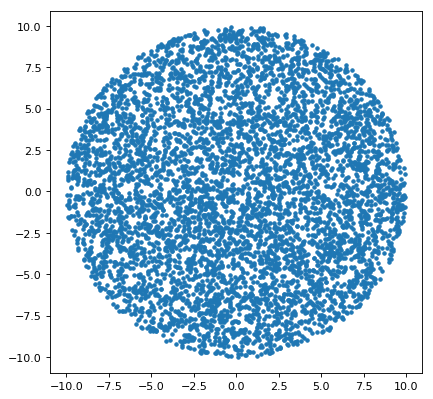

In [4]:
X = []
Y = []
plt.figure(figsize=(6,6),dpi=80)
def print_circle(length = 1.5):
    a= range(6000)
    for t in a:  
        theta = np.random.rand(1)*2*np.pi
        r=np.random.rand(1)*100
        X.append(np.sqrt(r)*np.cos(theta))
        Y.append(np.sqrt(r)*np.sin(theta))
    plt.scatter(X,Y,marker='.')
    plt.show()
print_circle()

极坐标取圆

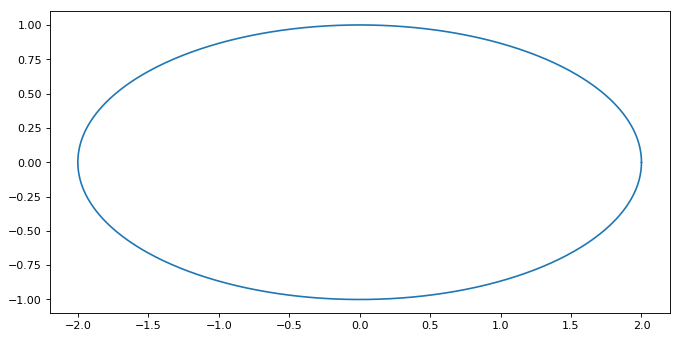

In [5]:
X = []
Y = []
plt.figure(figsize=(10,5),dpi=80)
def print_circle(length = 1.5):
    e = np.sqrt(0.75)
    p = 0.25
    theta = np.arange(0.0,2*np.pi,0.01)
    r = e*p/(1-e*np.cos(theta)) 
    a = 2
    b = 1
    for t in range(len(theta)):  
        X.append(a*np.cos(theta[t]))
        Y.append(b*np.sin(theta[t]))
    plt.plot(X,Y)
    plt.show()
print_circle()

椭圆取的是$\frac{x^2}{4} + \frac{y^2}{1} = 1$

#### 二、随机MC法
##### 1)投点

In [6]:
n = 10000
def MC_area2(times): 
    # 开始取样
    inside = 0
    # -3 到 3的二元均匀分布
    dots = np.random.rand(2, times)*4
    for i in range(times):
        x = dots[0, i] - 2
        y = dots[1, i] - 2
        #x = uniform(-3,3)
        #y = uniform(-3,3)
        if (np.sqrt((x-np.sqrt(3))**2 + (y)**2) + np.sqrt((x+np.sqrt(3))**2+y**2))<=4:
            inside += 1
    return inside/times*16
MC_area2(n)

6.2752

##### 2)计算误差

In [10]:
n = int(1e4)
lambda_n = MC_area2(n)/16
print("面积均值：Lambda_n=: ", lambda_n*16)
print("面积方差估计v_Lambda_n=: ", lambda_n*(1-lambda_n)/(n-1)*16**2)

面积均值：Lambda_n=:  6.3856
面积方差估计v_Lambda_n=:  0.006139985262526253


#### 三、随机限制区域MC法
##### 1)投点

6.276358613752347


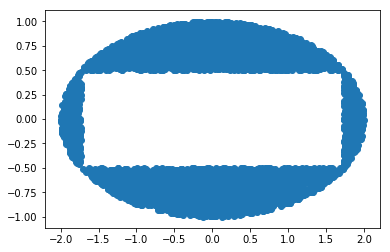

In [8]:
n = 10000
X=[]
Y=[]
def MC_area3(times): 
    # 开始取样
    inside = 0
    # -3 到 3的二元均匀分布
    def MC_area4(q):
        a,b,c,d = q
        x = np.random.rand(1)
        y = np.random.rand(1)
        x = c + x*(d-c)
        y = b + y*(a-b)
        return x,y
    
    for i in range(times):
        chosen = 0
        rand = np.random.rand(1)*(8-2*np.sqrt(3))
        if rand <= 2:
            q = 1
            x,y = MC_area4([1,0.5,-2,2])
        elif rand >2 and rand<=4:
            q = 2 
            x,y = MC_area4([-0.5,-1,-2,2])
        elif rand >4 and rand<=6-np.sqrt(3):
            q = 3 
            x,y = MC_area4([0.5,-0.5,-2,-np.sqrt(3)])
        elif rand >6-np.sqrt(3):
            q = 4
            x,y = MC_area4([0.5,-0.5,np.sqrt(3),2])

        if (np.sqrt((x-np.sqrt(3))**2 + (y)**2) + np.sqrt((x+np.sqrt(3))**2+y**2))<=4:
            inside += 1
            X.append(x)
            Y.append(y)

    return inside/times*(8-2*np.sqrt(3))+2*np.sqrt(3)
print(MC_area3(n))
plt.scatter(X,Y)

可以看到，我们把区域限制到了两个矩形之中，大矩形被椭圆分割，小矩形的形状依稀可见

##### 2)计算误差

In [11]:
n = int(1e4)
lambda_n = (MC_area3(n)-2*np.sqrt(3))/(8-2*np.sqrt(3))
print("面积均值Lambda_n=: ", lambda_n*(8-2*np.sqrt(3)) + 2*np.sqrt(3))
print("面积方差估计v_Lambda_n=: ", lambda_n*(1-lambda_n)/(n-1)*(8-2*np.sqrt(3))**2)
print("面积方差估计v_Lambda_n原先=: ",0.006)

面积均值Lambda_n=:  6.2926878479378505
面积方差估计v_Lambda_n=:  0.0004829762624677769
面积方差估计v_Lambda_n原先=:  0.006


结论：可以看到由于二项分布的参数变动(扣掉了矩形），再加上面积的缩放倍数减少，  
v_lambda_n这个估算方差的统计量的值也减少了一个数量级